# PIQT Phantom Reports On Siemens

## Distortion Using Grid Insert

Distortion and scale factors based on grid point positions with respect to the nominal grid geometry

In [5]:
from __future__ import division, print_function
%matplotlib inline
from os.path import join
import matplotlib.pyplot as plt

from mriqa.phantoms import PIQTDIST
from mriqa.reports import piqt_distortion_report, piqt_slice_profile_report
from dcmfetch import fetch_series
from pydicom import dcmread


### Distortion Measurements
#### General Notes

This is the Philips *PIQT* phantom - we need to get some details.

cf ACR: (190mm diameter, length 148mm) - filled with 10mM NiCl<sub>2</sub>, 75mM NaCl.

We should remove small rotations and shifts. Gross errors should be avoidable as there are unambiguous set up marks on the phantom. They seem to use multiple series (T<sub>1</sub>W, T<sub>2</sub>W etc) with quite course slices (5mm + 3mm).

#### Gradient Strength Calibration
The grid should give as gradient scales in X,Y. The length of the phantom would be our best bet in Z.
 - Full slice coverage (or a non-axial view)
 - Sufficient BW in S/S and R/O to minimise B<sub>0</sub> effects on scale/distortion
 - Relatively easy to do with edge detection and peak location
 - In-plane they take the phantom diameters at 4 angles at the level of the distortion grid
 - Expect 190mm &oslash; by 140mm length, both &plusmn;2mm
 - NB gradient amplifier warm up effects (really? for solid state amps?)

## Analysis of Grid Pattern

We need to decide on a phantom description to represent the spaced blobs. The only specific here are the number of blobs on a side, the blob spacing and the fact that the corners are missing. `Features` has generally been for the bounding ROIs so maybe that's not so useful.
Maybe we have just one `Feature` which is a `Grid`. Then we want the grid spacing and number of rows and cols. Either that of we have a `GridPositions` that just lists them all explicitly as a list of (x, y) tuples in mm. Or completely pre-calculate a bounding Box for each one.

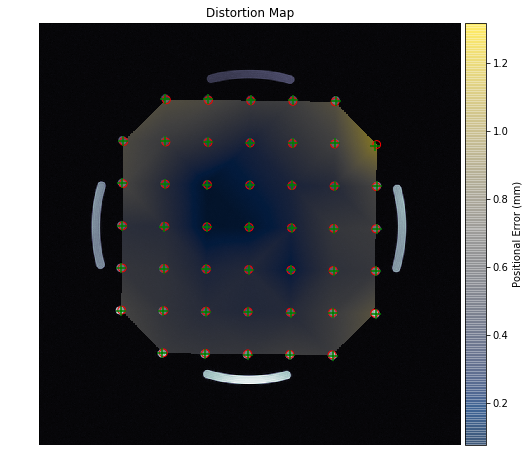

Protocol Orientation PhaseDirection  \
Series                                                             
36      SE_AXIAL_RL_PIQT_SL3_HEAD_512       Axial             RL   

        PixelBandwidth  Sensitivity  
Series                               
36               255.0      0.12194

In [46]:
# NB: No distortion corrrction, no PSN
dobjs = fetch_series('PQA20181130WESTON', '2', 36)
piqt_distortion_report(dobjs[1])

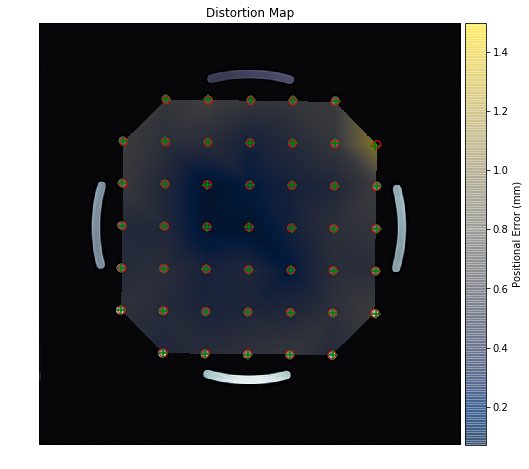

Protocol Orientation PhaseDirection  \
Series                                                             
37      SE_AXIAL_RL_PIQT_SL3_HEAD_512       Axial             RL   

        PixelBandwidth  Sensitivity  
Series                               
37               255.0      0.12194

In [47]:
# NB: 2D distortion corrected, no PSN
dobjs = fetch_series('PQA20181130WESTON', '2', 37)
piqt_distortion_report(dobjs[1])

This is a positive image so we've used the non prescan normalised images as PSN makes the background vary. Though it doesn't seem to make much difference either way here.

# Slice Profile Using Inclined Slots

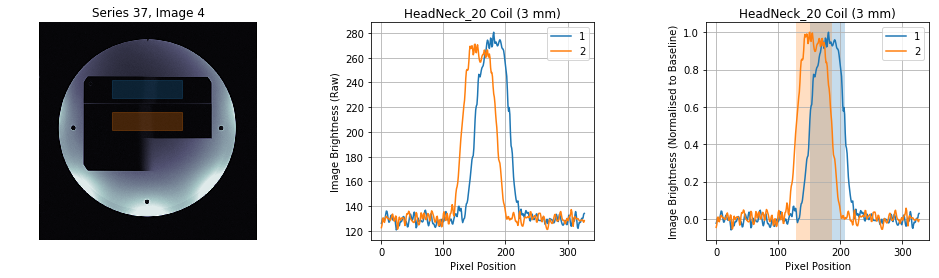

Plate Angle  =  11.7 degrees
FWHM     (1) =  57.0 pixels, or 2.9 mm
FWHM     (2) =  57.4 pixels, or 2.9 mm
FWHM (GMEAN) =  57.2 pixels, or 2.9 mm


In [44]:
# NB without PSN
dobjs = fetch_series('PQA20181130WESTON', '2', 37)
results = piqt_slice_profile_report(dobjs[3])

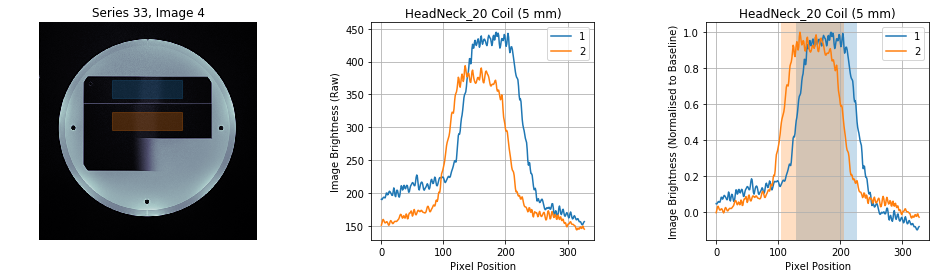

Plate Angle  =  11.7 degrees
FWHM     (1) =  98.4 pixels, or 5.0 mm
FWHM     (2) =  100.2 pixels, or 5.1 mm
FWHM (GMEAN) =  99.3 pixels, or 5.0 mm


FWHM1Pixels   FWHM1MM  FWHM2Pixels   FWHM2MM  FWHMGMeanPixels  \
SliceThickness                                                                  
3.0               57.025152  2.883140    57.388372  2.901504        57.206474   
5.0               98.448995  4.977492   100.195528  5.065795        99.318422   

                FWHMGMeanMM  
SliceThickness               
3.0                2.892307  
5.0                5.021449

In [45]:
# NB with PSN (there wasn't a non PSN series)
dobjs = fetch_series('PQA20181130WESTON', '2', 33)
results = results.append(piqt_slice_profile_report(dobjs[3]))
results

With a positive image like this it is better *not* to use prescan normalize as it is makes the dark noise background vary. This is the opposite case from the negative image where we wanted to minimize the intensity variation in the bright *background* and so did use PSN.
